In [1]:
import numpy as np
import pandas as pd

In [2]:
mar2003_raw = pd.read_csv('mar2003.csv', sep=';', low_memory=False)

In [3]:
mar2003_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7820 entries, 0 to 7819
Columns: 455 entries, adgained to V455
dtypes: int64(296), object(159)
memory usage: 27.1+ MB


In [4]:
vars2003 = ['numcode', 'ccode', 'group', 'country', 'region', 'year', 
            'prot', 'ecdis', 'poldis']

mar2003 = mar2003_raw.reindex(columns=vars2003)
mar2003.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7820 entries, 0 to 7819
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   numcode  7820 non-null   object
 1   ccode    7820 non-null   object
 2   group    7820 non-null   object
 3   country  7820 non-null   object
 4   region   7820 non-null   int64 
 5   year     7820 non-null   int64 
 6   prot     7820 non-null   int64 
 7   ecdis    7820 non-null   int64 
 8   poldis   7820 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 550.0+ KB


In [5]:
unique_years = mar2003.year.unique()
unique_years.sort()
unique_years

array([ -99,    0,    1,    2,    3,    4,    5,    6, 1920, 1923, 1940,
       1945, 1950, 1952, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003], dtype=int64)

In [6]:
mar2003 = mar2003[mar2003['year'] > 1989]

unique_years = mar2003.year.unique()
unique_years.sort()
unique_years

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003], dtype=int64)

In [7]:
mar2003.prot.unique()

array([  3,   2,   1,   0,   4,   5, -99,   6], dtype=int64)

In [8]:
mar2003 = mar2003[mar2003.prot != -99]
mar2003 = mar2003[mar2003.prot != 6]
mar2003.prot.unique()

array([3, 2, 1, 0, 4, 5], dtype=int64)

In [9]:
mar2003.ecdis.unique()

array([  1,   0,   4,   3,   2, -99], dtype=int64)

In [10]:
mar2003 = mar2003[mar2003.ecdis != -99]
mar2003.ecdis.unique()

array([1, 0, 4, 3, 2], dtype=int64)

In [11]:
mar2003.poldis.unique()

array([  1,   0,   2,   4,   3, -99], dtype=int64)

In [12]:
mar2003 = mar2003[mar2003.poldis != -99]
mar2003.poldis.unique()

array([1, 0, 2, 4, 3], dtype=int64)

In [13]:
mar2003.year.value_counts().sort_index(ascending=True)

1990    160
1991    179
1992    195
1993    200
1994    201
1995    199
1996    199
1997    201
1998    200
1999    202
2000    202
2001    277
2002    276
2003    276
Name: year, dtype: int64

In [14]:
full_years = []
for numcode in mar2003.numcode.value_counts().index:
    if mar2003.numcode.value_counts()[numcode] == 14:
        full_years.append(numcode)

mar2003 = mar2003[mar2003['numcode'].isin(full_years)]
mar2003.year.value_counts().sort_index(ascending=True)

1990    146
1991    146
1992    146
1993    146
1994    146
1995    146
1996    146
1997    146
1998    146
1999    146
2000    146
2001    146
2002    146
2003    146
Name: year, dtype: int64

In [15]:
len(mar2003.numcode.unique())

146

In [16]:
mar2006_raw = pd.read_csv('mar2006.csv', sep=';', low_memory=False)
vars2006 = ['numcode', 'ccode', 'VMAR_Group', 'country', 'VMAR_Region','year', 
            'PROT', 'GC10', 'ECDIS', 'POLDIS']

mar2006 = mar2006_raw.reindex(columns=vars2006)
mar2006 = mar2006.rename(columns={'VMAR_Group': 'group', 'VMAR_Region': 'region',
                                  'PROT': 'prot', 'GC10': 'kindred', 
                                  'ECDIS': 'ecdis', 'POLDIS': 'poldis'})
mar2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   numcode  852 non-null    int64 
 1   ccode    852 non-null    int64 
 2   group    852 non-null    object
 3   country  852 non-null    object
 4   region   852 non-null    int64 
 5   year     852 non-null    int64 
 6   prot     852 non-null    int64 
 7   kindred  852 non-null    int64 
 8   ecdis    852 non-null    int64 
 9   poldis   852 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 66.7+ KB


In [17]:
mar2006.prot.unique()

array([  3,   4,   5,   1,   0,   2, -99], dtype=int64)

In [18]:
mar2006 = mar2006[mar2006.prot != -99]
mar2006.prot.unique()

array([3, 4, 5, 1, 0, 2], dtype=int64)

In [19]:
mar2006.ecdis.unique()

array([  1,   0,   4,   3,   2, -99], dtype=int64)

In [20]:
mar2006 = mar2006[mar2006.ecdis != -99]
mar2006.ecdis.unique()

array([1, 0, 4, 3, 2], dtype=int64)

In [21]:
mar2006.year.value_counts().sort_index(ascending=True)

2004    280
2005    281
2006    281
Name: year, dtype: int64

In [22]:
full_years = []
for numcode in mar2006.numcode.value_counts().index:
    if mar2006.numcode.value_counts()[numcode] == 3:
        full_years.append(numcode)

mar2006 = mar2006[mar2006['numcode'].isin(full_years)]
mar2006.year.value_counts().sort_index(ascending=True)

2004    277
2005    277
2006    277
Name: year, dtype: int64

In [23]:
len(mar2006.numcode.unique())

277

In [24]:
mar2003 = mar2003.set_index(['numcode'], drop=True)
mar2003.index

Index(['203', '203', '203', '203', '203', '203', '203', '203', '203', '203',
       ...
       '95002', '95002', '95002', '95002', '95002', '95002', '95002', '95002',
       '95002', '95002'],
      dtype='object', name='numcode', length=2044)

In [25]:
mar2006 = mar2006.set_index(['numcode'], drop=True)
mar2006.index

Int64Index([  201,   201,   201,   202,   202,   202,   203,   203,   203,
              204,
            ...
            91001, 92001, 92001, 92001, 95001, 95001, 95001, 95002, 95002,
            95002],
           dtype='int64', name='numcode', length=831)

In [26]:
mar2003.ccode = mar2003.ccode.astype('int64')
mar2003.index = mar2003.index.astype('int64')

In [27]:
mar_complete = pd.concat([mar2003,mar2006], axis=0).sort_values(by=['numcode',
                                                                    'year'])
mar_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 201 to 95002
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ccode    2875 non-null   int64  
 1   group    2875 non-null   object 
 2   country  2875 non-null   object 
 3   region   2875 non-null   int64  
 4   year     2875 non-null   int64  
 5   prot     2875 non-null   int64  
 6   ecdis    2875 non-null   int64  
 7   poldis   2875 non-null   int64  
 8   kindred  831 non-null    float64
dtypes: float64(1), int64(6), object(2)
memory usage: 224.6+ KB


In [28]:
mar_complete.year.value_counts().sort_index(ascending=True)

1990    146
1991    146
1992    146
1993    146
1994    146
1995    146
1996    146
1997    146
1998    146
1999    146
2000    146
2001    146
2002    146
2003    146
2004    277
2005    277
2006    277
Name: year, dtype: int64

In [29]:
mar_complete['numcode'] = mar_complete.index
full_years = []

for numcode in mar_complete.numcode.value_counts().index:
    if mar_complete.numcode.value_counts()[numcode] == 17:
        full_years.append(numcode)

mar_complete = mar_complete[mar_complete['numcode'].isin(full_years)]
mar_complete = mar_complete.drop('numcode', axis=1)
mar_complete.year.value_counts().sort_index(ascending=True)

1990    143
1991    143
1992    143
1993    143
1994    143
1995    143
1996    143
1997    143
1998    143
1999    143
2000    143
2001    143
2002    143
2003    143
2004    143
2005    143
2006    143
Name: year, dtype: int64

In [30]:
mar_complete.count()

ccode      2431
group      2431
country    2431
region     2431
year       2431
prot       2431
ecdis      2431
poldis     2431
kindred     429
dtype: int64

In [31]:
mar_complete.kindred = mar_complete.kindred.fillna(method='bfill')
mar_complete.kindred = mar_complete.kindred.astype('int64')
mar_complete.count()

ccode      2431
group      2431
country    2431
region     2431
year       2431
prot       2431
ecdis      2431
poldis     2431
kindred    2431
dtype: int64

In [32]:
prot_region = mar_complete.groupby(['region', 'year']).sum().prot
prot_region = prot_region.rename("prot_region")
prot_region

region  year
0       1990    46
        1991    48
        1992    48
        1993    50
        1994    49
                ..
7       2002    51
        2003    43
        2004    35
        2005    36
        2006    40
Name: prot_region, Length: 102, dtype: int64

In [33]:
mar_complete = mar_complete.reset_index().merge(prot_region, how='left', 
                                                on=['year', 
                                                    'region']).set_index('numcode')
mar_complete.count()

ccode          2431
group          2431
country        2431
region         2431
year           2431
prot           2431
ecdis          2431
poldis         2431
kindred        2431
prot_region    2431
dtype: int64

In [34]:
prot_country = mar_complete.groupby(['ccode', 'year']).mean().prot
prot_country = prot_country.rename("prot_country")
prot_country

ccode  year
2      1990    3.0
       1991    3.0
       1992    2.0
       1993    3.0
       1994    3.0
              ... 
950    2002    3.0
       2003    0.0
       2004    0.0
       2005    0.0
       2006    0.0
Name: prot_country, Length: 1309, dtype: float64

In [35]:
mar_complete = mar_complete.reset_index().merge(prot_country, how='left', 
                                                on=['year', 
                                                    'ccode']).set_index('numcode')
mar_complete.count()

ccode           2431
group           2431
country         2431
region          2431
year            2431
prot            2431
ecdis           2431
poldis          2431
kindred         2431
prot_region     2431
prot_country    2431
dtype: int64

In [36]:
mar_complete['prot_region_minus'] = \
                            (mar_complete.prot_region - mar_complete.prot_country)
mar_complete.count()

ccode                2431
group                2431
country              2431
region               2431
year                 2431
prot                 2431
ecdis                2431
poldis               2431
kindred              2431
prot_region          2431
prot_country         2431
prot_region_minus    2431
dtype: int64

In [37]:
prot_groupcount = mar_complete.reset_index()\
                 .pivot_table(index='numcode').reset_index()\
                 .region.value_counts()

prot_groupcount = prot_groupcount.rename("prot_groupcount")
prot_groupcount.index.name = 'region'
prot_groupcount.sort_index(ascending=True)

region
0    24
2     9
3    40
5    11
6    34
7    25
Name: prot_groupcount, dtype: int64

In [38]:
mar_complete = mar_complete.reset_index().merge(prot_groupcount, how='left', 
                                                on='region').set_index('numcode')
mar_complete.count()

ccode                2431
group                2431
country              2431
region               2431
year                 2431
prot                 2431
ecdis                2431
poldis               2431
kindred              2431
prot_region          2431
prot_country         2431
prot_region_minus    2431
prot_groupcount      2431
dtype: int64

In [39]:
mar_complete['protnearby'] = \
(mar_complete.prot_region_minus / mar_complete.prot_groupcount)

mar_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 203 to 95002
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ccode              2431 non-null   int64  
 1   group              2431 non-null   object 
 2   country            2431 non-null   object 
 3   region             2431 non-null   int64  
 4   year               2431 non-null   int64  
 5   prot               2431 non-null   int64  
 6   ecdis              2431 non-null   int64  
 7   poldis             2431 non-null   int64  
 8   kindred            2431 non-null   int64  
 9   prot_region        2431 non-null   int64  
 10  prot_country       2431 non-null   float64
 11  prot_region_minus  2431 non-null   float64
 12  prot_groupcount    2431 non-null   int64  
 13  protnearby         2431 non-null   float64
dtypes: float64(3), int64(9), object(2)
memory usage: 284.9+ KB


In [40]:
mar_complete = mar_complete.drop(columns=['prot_region','prot_country',
                                          'prot_region_minus','prot_groupcount'])
mar_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 203 to 95002
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ccode       2431 non-null   int64  
 1   group       2431 non-null   object 
 2   country     2431 non-null   object 
 3   region      2431 non-null   int64  
 4   year        2431 non-null   int64  
 5   prot        2431 non-null   int64  
 6   ecdis       2431 non-null   int64  
 7   poldis      2431 non-null   int64  
 8   kindred     2431 non-null   int64  
 9   protnearby  2431 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 208.9+ KB


In [41]:
print(mar_complete.country.unique().size)
print(mar_complete.group.unique().size)

154
225


In [42]:
mar_complete.loc[mar_complete.country.str.contains('\"'), 'country'] = np.nan
mar_complete.country = mar_complete.country.fillna(method='bfill')

mar_complete.loc[mar_complete.group.str.contains('\"'), 'group'] = np.nan
mar_complete.group = mar_complete.group.fillna(method='bfill')

print(mar_complete.country.unique().size)
print(mar_complete.group.unique().size)

77
112


In [43]:
unhcr_raw = pd.read_csv('UNHCR refugees.csv', sep=',', low_memory=False)

unchr = unhcr_raw.reindex(columns=\
['Country or territory of asylum or residence',
 'Year',
 'Total refugees and people in refugee-like situations<sup>**</sup>'])

unchr = unchr.rename(columns=\
{'Country or territory of asylum or residence': 'country',
 'Year': 'year',
 'Total refugees and people in refugee-like situations<sup>**</sup>': 'refugees'})

unchr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96064 entries, 0 to 96063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   96064 non-null  object 
 1   year      96061 non-null  float64
 2   refugees  96020 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.2+ MB


In [44]:
unchr = unchr[unchr['year'] > 1989]
unchr = unchr[unchr['year'] < 2007]
unchr.year.unique()

array([2006., 2005., 2004., 2003., 2002., 2001., 2000., 1999., 1998.,
       1997., 1996., 1995., 1994., 1993., 1992., 1991., 1990.])

In [45]:
unchr = unchr[unchr.refugees.notnull()]
unchr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43636 entries, 48802 to 92475
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   43636 non-null  object 
 1   year      43636 non-null  float64
 2   refugees  43636 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.3+ MB


In [46]:
unchr = unchr.pivot_table(index=['country','year'], 
                          aggfunc=np.sum).reset_index()
unchr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   2418 non-null   object 
 1   year      2418 non-null   float64
 2   refugees  2418 non-null   float64
dtypes: float64(2), object(1)
memory usage: 56.8+ KB


In [47]:
unchr.year = unchr.year.astype('int64')
unchr.refugees = unchr.refugees.astype('int64')
unchr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   2418 non-null   object
 1   year      2418 non-null   int64 
 2   refugees  2418 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ KB


In [48]:
unchr.year.value_counts().sort_index(ascending=True)

1990    112
1991    118
1992    132
1993    139
1994    142
1995    143
1996    143
1997    147
1998    146
1999    151
2000    150
2001    151
2002    147
2003    147
2004    148
2005    149
2006    153
Name: year, dtype: int64

In [49]:
full_years = []
for country in unchr.country.value_counts().index:
    if unchr.country.value_counts()[country] == 17:
        full_years.append(country)

unchr = unchr[unchr['country'].isin(full_years)]
unchr.year.value_counts().sort_index(ascending=True)

1990    100
1991    100
1992    100
1993    100
1994    100
1995    100
1996    100
1997    100
1998    100
1999    100
2000    100
2001    100
2002    100
2003    100
2004    100
2005    100
2006    100
Name: year, dtype: int64

In [50]:
len(unchr.country.unique())

100

In [51]:
qualified_countries = []
disqualified_countries = []

for country in unchr.country.unique():
    if country in mar_complete.country.unique():
        qualified_countries.append(country)
    else:
        disqualified_countries.append(country)

print(len(qualified_countries))
print(len(disqualified_countries))

50
50


In [52]:
remaining_countries = []
for country in mar_complete.country.unique():
    if country not in qualified_countries:
        remaining_countries.append(country)

np.sort(remaining_countries)

array(['Afghanistan', 'Albania', 'Bahrain', 'Bhutan', 'Bolivia',
       'Bulgaria', 'Burma', 'Dominican Republic', 'Fiji', 'Guyana',
       'Iran', 'Israel', 'Korea, South', 'Laos', 'Madagascar', 'Namibia',
       'Romania', 'Singapore', 'Somalia', 'South Africa', 'Sri Lanka',
       'Taiwan', 'Tanzania', 'United States of America', 'Venezuela',
       'Vietnam', 'Yugoslavia'], dtype='<U24')

In [53]:
def rename_country(old, new):
    unchr.loc[unchr.country.str.contains(old, regex=False), 'country'] = new
    
rename_country('Bolivia (Plurinational State of)', 'Bolivia')
rename_country('Islamic Rep. of Iran', 'Iran')
rename_country('United Rep. of Tanzania', 'Tanzania')
rename_country('United States', 'United States of America')
rename_country('Venezuela (Bolivarian Republic of)', 'Venezuela')
rename_country('Viet Nam', 'Vietnam')

qualified_countries = []
disqualified_countries = []

for country in unchr.country.unique():
    if country in mar_complete.country.unique():
        qualified_countries.append(country)
    else:
        disqualified_countries.append(country)

print(len(qualified_countries))
print(len(disqualified_countries))

56
44


In [54]:
unchr = unchr[unchr['country'].isin(qualified_countries)]
len(unchr.country.unique())

56

In [55]:
print(unchr.refugees.min())
print(unchr.refugees.max())

9
4404995


In [56]:
unchr['logrefugees'] = np.log(unchr['refugees'])
print(unchr.logrefugees.min())
print(unchr.logrefugees.max())

2.1972245773362196
15.298249682277993


In [57]:
final_data = mar_complete.reset_index().merge(unchr, how='right', 
                                              on=['country', 'year'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1887 entries, 0 to 1886
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   numcode      1887 non-null   int64  
 1   ccode        1887 non-null   int64  
 2   group        1887 non-null   object 
 3   country      1887 non-null   object 
 4   region       1887 non-null   int64  
 5   year         1887 non-null   int64  
 6   prot         1887 non-null   int64  
 7   ecdis        1887 non-null   int64  
 8   poldis       1887 non-null   int64  
 9   kindred      1887 non-null   int64  
 10  protnearby   1887 non-null   float64
 11  refugees     1887 non-null   int64  
 12  logrefugees  1887 non-null   float64
dtypes: float64(2), int64(9), object(2)
memory usage: 206.4+ KB


In [58]:
polity_raw = pd.read_csv('Polity IV.csv', sep=';', low_memory=False)
polity = polity_raw.reindex(columns=['ccode', 'year', 'polity2'])
polity = polity.rename(columns={'polity2': 'democracy'})
polity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17228 entries, 0 to 17227
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ccode      17228 non-null  int64 
 1   year       17228 non-null  int64 
 2   democracy  17228 non-null  object
dtypes: int64(2), object(1)
memory usage: 403.9+ KB


In [59]:
polity = polity[polity['year'] > 1989]
polity = polity[polity['year'] < 2007]
polity.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006], dtype=int64)

In [60]:
polity = polity[polity.democracy != ' ']
polity.democracy = polity.democracy.astype('int64')
polity.democracy.unique()

array([ -8,   0,  -7,   1,   5,   7,   9,  -2,  -3,   2,  -1,   8,   3,
        -6,  10, -10,  -9,   6,  -5,  -4,   4], dtype=int64)

In [61]:
polity.year.value_counts().sort_index(ascending=True)

1990    144
1991    160
1992    160
1993    163
1994    162
1995    161
1996    161
1997    161
1998    161
1999    161
2000    161
2001    160
2002    161
2003    159
2004    160
2005    161
2006    163
Name: year, dtype: int64

In [62]:
full_years = []
for ccode in polity.ccode.value_counts().index:
    if polity.ccode.value_counts()[ccode] == 17:
        full_years.append(ccode)

polity = polity[polity['ccode'].isin(full_years)]
polity.year.value_counts().sort_index(ascending=True)

1990    134
1991    134
1992    134
1993    134
1994    134
1995    134
1996    134
1997    134
1998    134
1999    134
2000    134
2001    134
2002    134
2003    134
2004    134
2005    134
2006    134
Name: year, dtype: int64

In [63]:
final_data = final_data.merge(polity, how='inner', on=['ccode', 'year'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1785 entries, 0 to 1784
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   numcode      1785 non-null   int64  
 1   ccode        1785 non-null   int64  
 2   group        1785 non-null   object 
 3   country      1785 non-null   object 
 4   region       1785 non-null   int64  
 5   year         1785 non-null   int64  
 6   prot         1785 non-null   int64  
 7   ecdis        1785 non-null   int64  
 8   poldis       1785 non-null   int64  
 9   kindred      1785 non-null   int64  
 10  protnearby   1785 non-null   float64
 11  refugees     1785 non-null   int64  
 12  logrefugees  1785 non-null   float64
 13  democracy    1785 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 209.2+ KB


In [64]:
worldbank_raw = pd.read_csv('GDP per capita.csv', sep=';',low_memory=False)
worldbank = worldbank_raw.drop(columns=['IndicatorName', 'IndicatorCode', 'CountryCode'])
worldbank = worldbank.melt(id_vars='CountryName')
worldbank = worldbank.reindex(columns=['CountryName', 'variable', 'value'])
worldbank = worldbank.rename(columns={'CountryName': 'country', 
                                      'variable': 'year', 
                                      'value': 'GDP'})
worldbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  15312 non-null  object
 1   year     15312 non-null  object
 2   GDP      15312 non-null  object
dtypes: object(3)
memory usage: 359.0+ KB


In [65]:
worldbank.year = worldbank.year.str.lstrip('@').astype('int64')
worldbank = worldbank[worldbank['year'] > 1989]
worldbank = worldbank[worldbank['year'] < 2007]
worldbank.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006], dtype=int64)

In [66]:
worldbank = worldbank[worldbank.GDP != ' ']
np.isin(" ", worldbank.GDP.unique())

array(False)

In [67]:
worldbank.country.value_counts().sort_index(ascending=True)

Afghanistan            6
Albania               17
Algeria               17
American Samoa         5
Andorra               17
                      ..
West Bank and Gaza    13
World                 17
Yemen, Rep.           17
Zambia                17
Zimbabwe              17
Name: country, Length: 253, dtype: int64

In [68]:
full_years = []
for country in worldbank.country.value_counts().index:
    if worldbank.country.value_counts()[country] == 17:
        full_years.append(country)

worldbank = worldbank[worldbank['country'].isin(full_years)]
worldbank.country.value_counts().sort_index(ascending=True)

Albania                17
Algeria                17
Andorra                17
Angola                 17
Antigua and Barbuda    17
                       ..
Vietnam                17
World                  17
Yemen, Rep.            17
Zambia                 17
Zimbabwe               17
Name: country, Length: 216, dtype: int64

In [69]:
worldbank.GDP = worldbank.GDP.str.replace(',','.')
worldbank.GDP = worldbank.GDP.astype('float64')
worldbank.GDP.describe()

count      3672.000000
mean       7813.077023
std       13626.270943
min          65.011416
25%         609.116060
50%        2032.312954
75%        7672.450920
max      135535.002415
Name: GDP, dtype: float64

In [70]:
qualified_countries = []
disqualified_countries = []

for country in worldbank.country.unique():
    if country in final_data.country.unique():
        qualified_countries.append(country)
    else:
        disqualified_countries.append(country)

print(len(qualified_countries))
print(len(disqualified_countries))

47
169


In [71]:
remaining_countries = []
for country in final_data.country.unique():
    if country not in qualified_countries:
        remaining_countries.append(country)

np.sort(remaining_countries)

array(['Dem. Rep. of the Congo', 'Egypt', 'Hungary', 'Iran',
       'United States of America', 'Venezuela'], dtype='<U24')

In [72]:
def rename_country2(old, new):
    worldbank.loc[worldbank.country.str.contains(old, regex=False),'country'] = new
    
rename_country2('Congo, Dem. Rep.', 'Dem. Rep. of the Congo')
rename_country2('Egypt, Arab Rep.', 'Egypt')
rename_country2('United States', 'United States of America')
rename_country2('Venezuela, RB', 'Venezuela')

qualified_countries = []
disqualified_countries = []

for country in worldbank.country.unique():
    if country in final_data.country.unique():
        qualified_countries.append(country)
    else:
        disqualified_countries.append(country)

print(len(qualified_countries))
print(len(disqualified_countries))

51
165


In [73]:
worldbank = worldbank[worldbank['country'].isin(qualified_countries)]
len(worldbank.country.unique())

51

In [74]:
final_data = final_data.merge(worldbank, how='inner', on=['country', 'year'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 0 to 1733
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   numcode      1734 non-null   int64  
 1   ccode        1734 non-null   int64  
 2   group        1734 non-null   object 
 3   country      1734 non-null   object 
 4   region       1734 non-null   int64  
 5   year         1734 non-null   int64  
 6   prot         1734 non-null   int64  
 7   ecdis        1734 non-null   int64  
 8   poldis       1734 non-null   int64  
 9   kindred      1734 non-null   int64  
 10  protnearby   1734 non-null   float64
 11  refugees     1734 non-null   int64  
 12  logrefugees  1734 non-null   float64
 13  democracy    1734 non-null   int64  
 14  GDP          1734 non-null   float64
dtypes: float64(3), int64(10), object(2)
memory usage: 216.8+ KB


In [75]:
final_data['protlag'] = final_data.prot.shift(1)
final_data = final_data[final_data['year'] != 1990]
final_data.protlag = final_data.protlag.astype('int64')
final_data = final_data.reindex(columns=['numcode', 'group', 'ccode', 
                                         'country', 'year', 'prot', 
                                         'protlag','protnearby', 'kindred', 
                                         'refugees','logrefugees', 'ecdis',
                                         'poldis', 'democracy', 'GDP', 'region'])
final_data.to_csv('final_data.csv', sep=';')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 1 to 1733
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   numcode      1632 non-null   int64  
 1   group        1632 non-null   object 
 2   ccode        1632 non-null   int64  
 3   country      1632 non-null   object 
 4   year         1632 non-null   int64  
 5   prot         1632 non-null   int64  
 6   protlag      1632 non-null   int64  
 7   protnearby   1632 non-null   float64
 8   kindred      1632 non-null   int64  
 9   refugees     1632 non-null   int64  
 10  logrefugees  1632 non-null   float64
 11  ecdis        1632 non-null   int64  
 12  poldis       1632 non-null   int64  
 13  democracy    1632 non-null   int64  
 14  GDP          1632 non-null   float64
 15  region       1632 non-null   int64  
dtypes: float64(3), int64(11), object(2)
memory usage: 216.8+ KB


In [76]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results_icc = smf.mixedlm('prot ~ numcode', data=final_data, 
                          groups=final_data.numcode).fit()
results_icc.cov_re / (results_icc.cov_re + results_icc.scale)

,Group
Group,0.456259


In [77]:
model = smf.mixedlm('prot ~ 1 + protlag + protnearby + kindred +\
                     logrefugees + kindred*logrefugees + ecdis +\
                     poldis + ecdis*poldis + democracy + GDP',
                     data=final_data,
                     groups='numcode')
results = model.fit()

Text(0.5, 1.0, 'Scatter plot of residual and predicted values of prot')

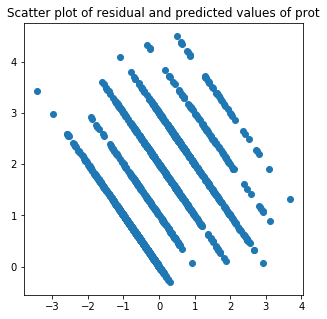

In [78]:
import matplotlib.pyplot as plt

pred_val = results.fittedvalues
true_val = final_data.prot.values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(residual, pred_val)
plt.title("Scatter plot of residual and predicted values of prot")

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vifvars = final_data.reindex(columns=['protnearby','kindred', 'refugees', 'ecdis', 'poldis'])

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(vifvars.values, i) for i in range(vifvars.shape[1])]
print(vif.set_index(vifvars.columns).round(2))

             VIF
protnearby  4.97
kindred     2.93
refugees    1.25
ecdis       5.00
poldis      4.39


In [80]:
results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:              MixedLM   Dependent Variable:   prot      
No. Observations:   1632      Method:               REML      
No. Groups:         102       Scale:                1.0786    
Min. group size:    16        Log-Likelihood:       -2537.1985
Max. group size:    16        Converged:            Yes       
Mean group size:    16.0                                      
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           -0.307    0.475 -0.647 0.518 -1.239  0.624
protlag              0.089    0.025  3.592 0.000  0.041  0.138
protnearby           0.628    0.091  6.906 0.000  0.449  0.806
kindred             -0.052    0.262 -0.200 0.841 -0.565  0.460
logrefugees          0.043    0.042  1.036 0.300 -0.039  0.126
kindred:logrefugees -0.004    0.025 -0.151 0.880 -0.052  0.045
ecdis                0.163    0.071  2.301 0.021  0.024  0.302
poldis               0.248    0.066  3.789 0.000  0.120  0.377
ecdis:poldis        -0.076    0.025 -3.044 0.002 -0.125 -0.027
democracy            0.039    0.009  4.588 0.000  0.023  0.056
GDP                 -0.000    0.000 -1.707 0.088 -0.000  0.000
numcode Var          0.799    0.125                           
==============================================================

"""

In [81]:
# eafea